**Module Path**

In [1]:
import os

os.chdir("./../../")

### Part 0: Explore Taxi-v3

We begin by importing the necessary packages.

In [2]:
import numpy as np
from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

import matplotlib.pyplot as plt

# Set plotting options
%matplotlib inline
plt.style.use("ggplot")
np.set_printoptions(precision=3, linewidth=120)

is_ipython = "inline" in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

from examples.cliffwalking.plot_utils import plot_values

Use the code cell below to create an instance of the [CliffWalking](https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py) environment.

In [3]:
from env import Environment
from policy import RandomPolicy

In [4]:
env = Environment("taxi")

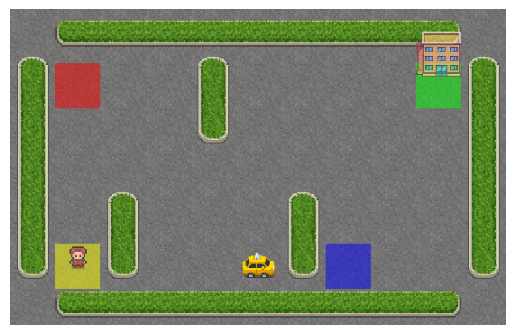

In [5]:
env.watch(RandomPolicy(env.get_action_space()), display, steps=10)

In [6]:
print(env.get_observation_space())
print(env.get_action_space())

Discrete(500)
Discrete(6)


### Part 1: TD Control: Sarsa


In [7]:
from qtable import DictionaryQTable
from policy import SarsaPolicy

q_table = DictionaryQTable()
q_table.initialize(env.get_action_space().n)
policy = SarsaPolicy(q_table, env.get_action_space())

In [8]:
from train import TrainerTD

trainer = TrainerTD(policy, env)
trainer.train(50_000)

In [9]:
Q_sarsa = q_table.q_values

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  


Estimated Optimal Policy:
[[ 0  4  4  4  0 -1  0  0  0  0 -1  0]
 [ 2  0  0 -1  5  3  0  2 -1  3  3  3]
 [ 0 -1  0  0  0  0 -1  0  0  0  0 -1]
 [ 3  0  0  0 -1  0  0  0  2 -1  2  2]]


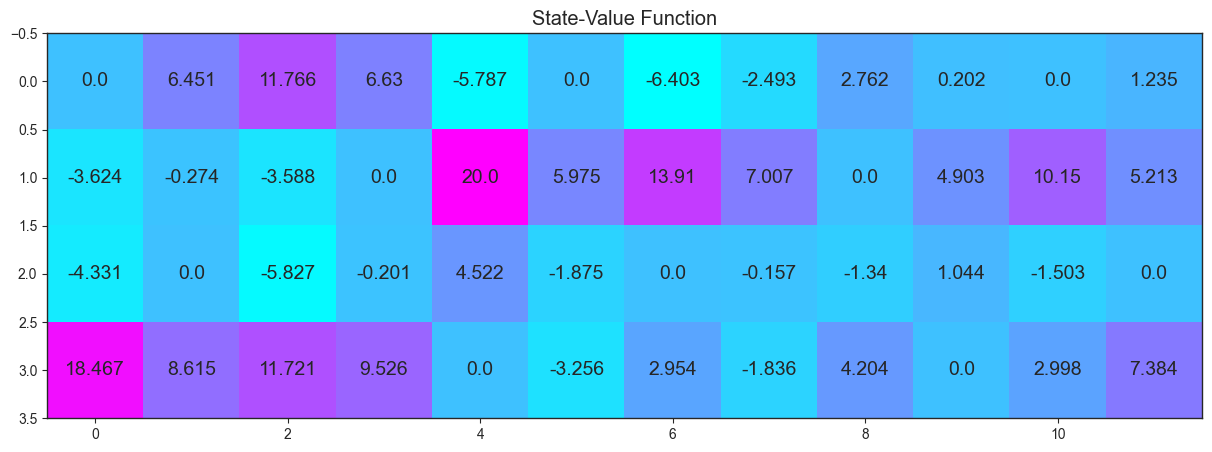

In [10]:
# print the estimated optimal policy
policy_sarsa = np.array(
    [np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]
).reshape(4, 12)
print("\nEstimated Optimal Policy:")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = [np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)]
plot_values(V_sarsa)

In [11]:
trainer.evaluate(50_000)

Evaluation: Average reward over 50000 episodes: -7.3358


### Part 2: TD Control: Q-learning

In [12]:
from policy import SarsaMaxPolicy

q_table = DictionaryQTable()
q_table.initialize(env.get_action_space().n)
policy = SarsaMaxPolicy(q_table, env.get_action_space())

trainer = TrainerTD(policy, env)
trainer.train(50_000)

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function. 


Estimated Optimal Policy:
[[ 0  4  4  4  0 -1  2  0  0  0 -1  0]
 [ 0  2  0 -1  5  0  0  0 -1  3  3  3]
 [ 0 -1  0  0  3  0 -1  0  0  0  0 -1]
 [ 3  0  3  0 -1  0  0  0  2 -1  2  2]]


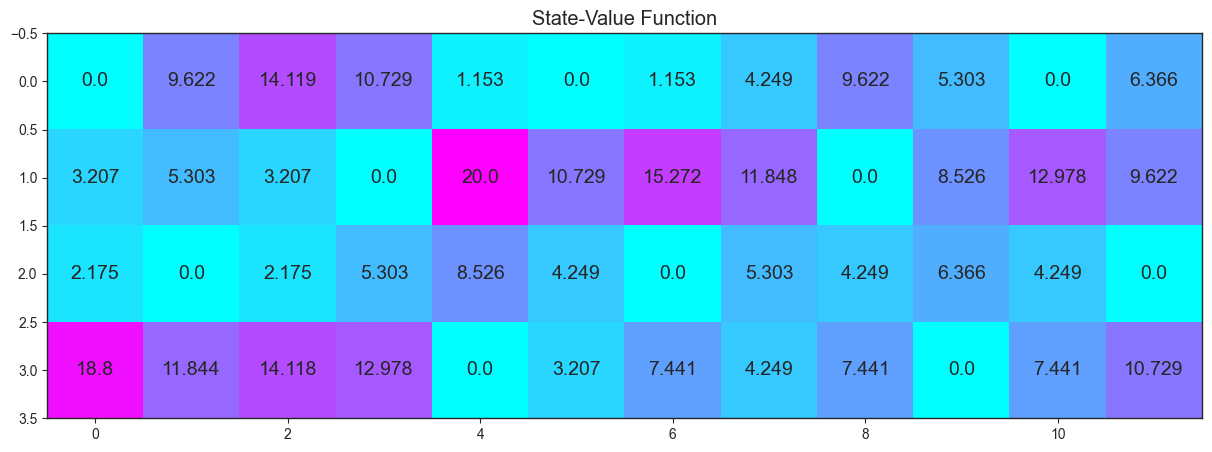

In [13]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsamax = q_table.q_values

# print the estimated optimal policy
policy_sarsamax = np.array(
    [np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]
).reshape((4, 12))
print("\nEstimated Optimal Policy:")
print(policy_sarsamax)

# plot the estimated optimal state-value function
plot_values(
    [np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)]
)

In [14]:
trainer.evaluate(50_000)

Evaluation: Average reward over 50000 episodes: 2.33364


### Part 3: TD Control: Expected Sarsa

In [15]:
from policy import SarsaExpectedPolicy

q_table = DictionaryQTable()
q_table.initialize(env.get_action_space().n)
policy = SarsaExpectedPolicy(q_table, env.get_action_space())

trainer = TrainerTD(policy, env)
trainer.train(50_000)

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  


Estimated Optimal Policy:
[[ 0  4  4  4  0 -1  2  0  0  0 -1  0]
 [ 2  0  0 -1  5  0  0  0 -1  3  3  3]
 [ 0 -1  0  0  0  0 -1  0  0  0  0 -1]
 [ 3  0  0  0 -1  0  0  0  2 -1  2  2]]


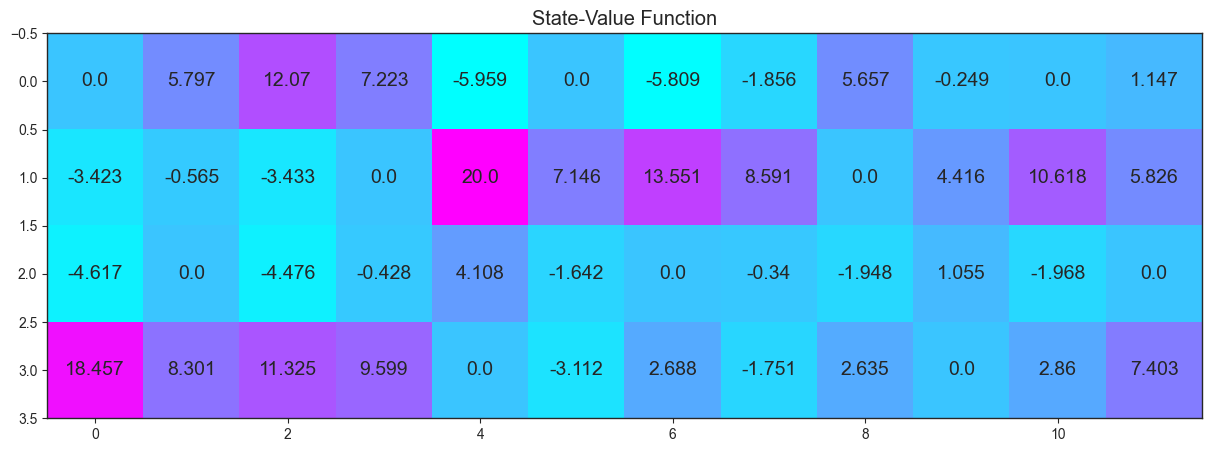

In [16]:
# obtain the estimated optimal policy and corresponding action-value function
Q_expsarsa = q_table.q_values

# print the estimated optimal policy
policy_expsarsa = np.array(
    [np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]
).reshape(4, 12)
print("\nEstimated Optimal Policy:")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values(
    [np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)]
)

In [17]:
trainer.evaluate(50_000)

Evaluation: Average reward over 50000 episodes: 2.42552


Score:  -19


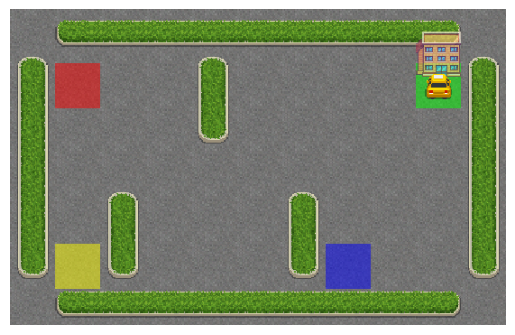

In [18]:
env.watch(policy, display)